# <center>Network equilibria</center>
### <center>Alfred Galichon (NYU & Sciences Po)</center>
## <center>'math+econ+code' masterclass series</center>
#### <center>With python code examples</center>
© 2018–2023 by Alfred Galichon. Past and present support from NSF grant DMS-1716489, ERC grant CoG-866274 are acknowledged, as well as inputs from contributors listed [here](http://www.math-econ-code.org/team).

**If you reuse material from this masterclass, please cite as:**<br>
Alfred Galichon, 'math+econ+code' masterclass series. https://www.math-econ-code.org/

# References

## Textbooks

Alvin Roth and Marilda Sotomayor (1990). *Two-sided matching*. Econometric Society Monographs, Cambridge University Press.

## Papers

David Gale and Lloyd Shapley (1962). "College Admissions and the Stability of Marriage." *American Mathematical Monthly* 69 (1), pp. 9–14.

Hiroyuki Adachi (2000). "On a characterization of stable matchings." *Economics Letters* 68 pp. 43–49.

Alfred Galichon and Yu-Wei Hsieh (2019)."Aggregate stable matching with money burning." SSRN id=2887732. 



# References

## Textbooks

* Bertsekas (1998). *Network Optimization: Continuous and Discrete Models (Optimization, Computation, and Control)*. Athena Scientific.

* Galichon, *Optimal Transport Methods in Economics*. Ch.8.

## Papers

* Galichon, Samuelson, Vernet, "Uniform Gross Substitutes". In progress, slides available [here]( https://github.com/alfredgalichon/presentations/blob/b287efc265a40be23213993c20d983c78cb773db/2021-06-15_Galichon_SAET_slides.pdf).
* Boeing, G. 2017. "OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks." *Computers, Environment and Urban Systems* 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004



# Networks

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


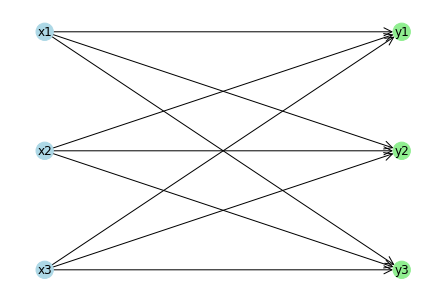

In [2]:
B = nx.DiGraph()
origins = ['x1','x2','x3']
destinations = ['y1','y2','y3']
B.add_nodes_from(origins, bipartite=0) # Add the node attribute "bipartite"
B.add_nodes_from(destinations, bipartite=1)
B.add_edges_from([(o,d) for o in origins for d in destinations])


pos = {}

# Update position for node from each group
pos.update((node, (1, 2-index)) for index, node in enumerate(origins))
pos.update((node, (2, 2-index)) for index, node in enumerate(destinations))

color_map=['lightblue','lightblue','lightblue','lightgreen','lightgreen','lightgreen']
nx.draw(B, pos = pos, node_color=color_map, with_labels=True, arrowsize=20,arrowstyle='->')

plt.show()

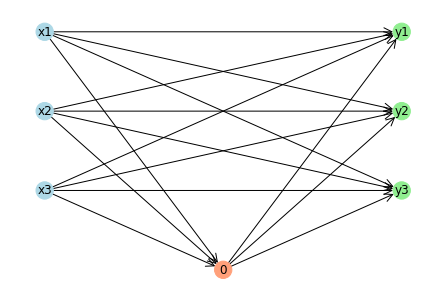

In [14]:
Bu = nx.DiGraph()
origins = ['x1','x2','x3']
destinations = ['y1','y2','y3']
zero = [0]
Bu.add_nodes_from(origins) # Add the node attribute "bipartite"
Bu.add_nodes_from(destinations)
Bu.add_nodes_from(zero)
Bu.add_edges_from([(o,d) for o in origins for d in destinations])
Bu.add_edges_from([(o,z) for o in origins for z in zero])
Bu.add_edges_from([(z,d) for z in zero for d in destinations])

pos = {}
pos.update((node, (1, 2-index)) for index, node in enumerate(origins))
pos.update((node,(2,-1)) for node in zero)
pos.update((node, (3, 2-index)) for index, node in enumerate(destinations))


color_map=['lightblue','lightblue','lightblue','lightgreen','lightgreen','lightgreen','lightsalmon']
nx.draw(Bu, pos = pos, node_color=color_map, with_labels=True, arrowsize=20,arrowstyle='->')
plt.show()

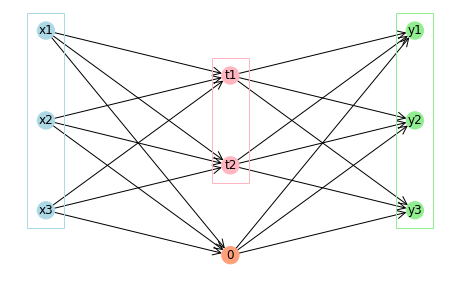

In [62]:
H = nx.DiGraph()
origins = ['x1','x2','x3']
destinations = ['y1','y2','y3']
transits = ['t1','t2','0']
H.add_nodes_from(origins) 
H.add_nodes_from(destinations)
H.add_nodes_from(transits)
H.add_edges_from([(o,t) for o in origins for t in transits])
H.add_edges_from([(t,d) for t in transits for d in destinations])


pos = {}
pos.update((node, (1, 2-index)) for index, node in enumerate(origins))
pos.update((node, (2, 1.5-index)) for index, node in enumerate(transits))
pos.update((node, (3, 2-index)) for index, node in enumerate(destinations))

f,ax = plt.subplots(1,1, figsize=(8,5))
color_map=['lightblue','lightblue','lightblue','lightgreen','lightgreen','lightgreen','lightpink','lightpink', 'lightsalmon']
nx.draw(H, pos = pos, node_color=color_map, with_labels=True, arrowsize=20,arrowstyle='->')


from matplotlib.patches import Rectangle


ax.add_patch(Rectangle((0.9,-0.2),0.2,2.4,linewidth=1,edgecolor='lightblue',facecolor='none'))

ax.add_patch(Rectangle((1.9,0.3),0.2,1.4,linewidth=1,edgecolor='lightpink',facecolor='none'))

ax.add_patch(Rectangle((2.9,-0.2),0.2,2.4,linewidth=1,edgecolor='lightgreen',facecolor='none'))

plt.show()

In [19]:
# arcs = list(H.edges)
# nodes = list(H.nodes)
class EquilibriumFlowProblem:
    def __init__(self,Z, A,q_z,G_a):
        self.Z = Z
        self.A = A
        # self.Nabla = 
        self.q_z = q_z
        self.G_a = G_a
    
    def isEquilibrium(self,p_z,μ_a):
        ...
        
    def p_from_μ(self,μ_a):
        ...
    
    def μ_from_p(self,p_z):
        ...
    
    
        

# Urban networks



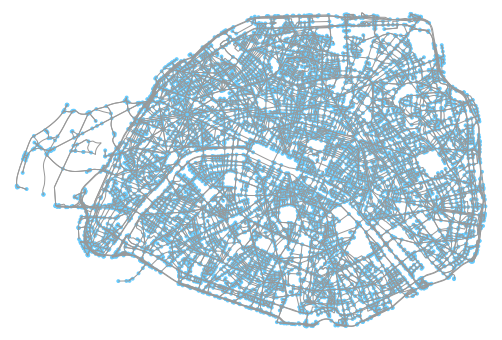

(<Figure size 629.512x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2680856c988>)

In [2]:
import networkx as nx
import osmnx as ox
#NY = ox.graph_from_place('New York, NY', network_type = 'drive')
#ox.plot_graph(ox.project_graph(NY))
G = ox.graph_from_place('Paris, France', network_type = 'drive')
ox.plot_graph(ox.project_graph(G))

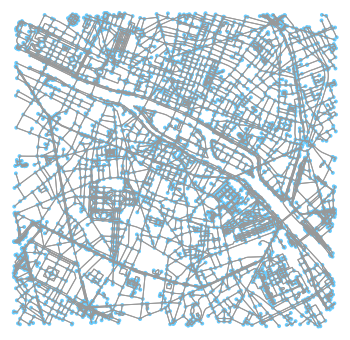

(<Figure size 433.497x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26808a8ab08>)

In [3]:
nyu_address='57 boulevard Saint-Germain, 75005 Paris, France'
scpo_address='27 rue Saint-Guillaume, 75007 Paris, France'
Gbis = ox.graph.graph_from_address(nyu_address, dist=2000,network_type = 'walk')
ox.plot_graph(ox.project_graph(Gbis))

In [4]:
nyu_coord  = ox.geocode(nyu_address)
scpo_coord = ox.geocode(scpo_address)
print(nyu_coord,scpo_coord)

(48.8503201, 2.346987) (48.854141, 2.328387)


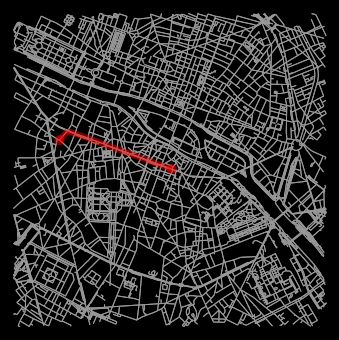

In [5]:
Gbis = ox.add_edge_speeds(Gbis)
Gbis = ox.add_edge_travel_times(Gbis)

nyu_coord  = ox.geocode(nyu_address)
scpo_coord = ox.geocode(scpo_address)
orig = ox.distance.nearest_nodes(Gbis, nyu_coord[0],nyu_coord[1])
dest = ox.distance.nearest_nodes(Gbis, scpo_coord[0],scpo_coord[1])

route = nx.shortest_path(Gbis, orig, dest, weight='length')
fig, ax = ox.plot_graph_route(Gbis, route, route_linewidth=6, node_size=0, bgcolor='k')


In [7]:
edge_lengths = ox.utils_graph.get_route_edge_attributes(Gbis, route, 'length')
sum(edge_lengths) # length of the route in meters

1571.906

In [8]:
import numpy as np
arc_list = list(G.edges)
node_list = list(G.nodes)
nbNodes = len(node_list)
nbArcs=len(arc_list)

In [9]:
nbNodes

10028

In [10]:
nbArcs

19535

In [11]:
import numpy as np
arc_list = list(G.edges)
node_list = list(G.nodes)
nbNodes = len(node_list)
nbArcs=len(arc_list)

node_keys = np.zeros(nbNodes,dtype = 'int64')
arcs = np.zeros((nbArcs,3),dtype = 'int64')

(_, nbDiffNodes) = np.unique(node_keys, return_counts=True)
if nbDiffNodes != nbNodes :
    raise Exception("Problem with node indexing.")



for z in range(nbNodes):
    node_keys[z] = node_list[z]

for a in range(nbArcs):
    orig_key = arc_list[a][0]
    dest_key = arc_list[a][1]
    arcs[a,0] = np.where(node_keys ==  orig_key)[0] # origin of arc a
    arcs[a,1] = np.where(node_keys == dest_key)[0] # destination of arc a
    arcs[a,2] = G[orig_key][dest_key][0]["length"] # length of arc a

